<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Telecom X - Análise de Evasão de Clientes



Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

O que você vai praticar:

✅ Importar e manipular dados de uma API de forma eficiente.

✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.

✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.

✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.



## Arquitetura Medalhão

Nessa análise utilizaremos a Arquitetura Medalhão, para uma melhor organização e qualidade dos dados.
Serão utilizadas 3 camadas, Bronze, Prata e Ouro, para mantermos a rastreabilidade durante o tratamento dos dados.

- Camada Bronze:
  Esta camada armazena cópias dos dados brutos, como foram recebidos da fonte. É um ponto de partida para a jornada dos dados, onde eles são armazenados sem modificações significativas.
- Camada Prata:
  Na camada Prata, os dados são limpos, transformados e enriquecidos, removendo dados redundantes ou inválidos. Inclui a validação de dados, desduplicação e agregação de informações.
- Camada Ouro:
  A camada Ouro representa o nível mais alto de refinamento, onde os dados são transformados em formatos otimizados para análises e tomada de decisões. Aqui, os dados são preparados para serem utilizados por ferramentas de análise de dados e relatórios.



## Preparação do ambiente:

In [1]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os

In [2]:
#Criar a estrutura de diretórios para a armazenar os dados
!mkdir -p data
!mkdir -p data/bronze
!mkdir -p data/prata
!mkdir -p data/ouro

#📌 Extracão - Camada Bronze

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'


In [4]:
dados = pd.read_json(url)
dados.to_json('data/bronze/TelecomX_Data.json')
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## Normalização dos dados JSON

In [5]:
# Lista de colunas JSON
json_columns = ['customer','phone','internet', 'account']

# Normalizar todas as colunas JSON e concatenar
normalized_dfs = [pd.json_normalize(dados[col]) for col in json_columns]
df_bronze = pd.concat([dados[['id']] if 'id' in dados.columns else dados.drop(columns=json_columns), *normalized_dfs], axis=1)

df_bronze

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
#Salvar os dados normalizados na camada bronze
df_bronze.to_parquet('data/bronze/TelecomX_Data.parquet')

#🔧 Transformação - Camada Prata

## Exploração inicial dos dados

In [7]:
df_prata = df_bronze.copy()

### Dicionário de dados

  

    customerID: número de identificação único de cada cliente
    Churn: se o cliente deixou ou não a empresa
    gender: gênero (masculino e feminino)
    SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    Partner: se o cliente possui ou não um parceiro ou parceira
    Dependents: se o cliente possui ou não dependentes
    tenure: meses de contrato do cliente
    PhoneService: assinatura de serviço telefônico
    MultipleLines: assisnatura de mais de uma linha de telefone
    InternetService: assinatura de um provedor internet
    OnlineSecurity: assinatura adicional de segurança online
    OnlineBackup: assinatura adicional de backup online
    DeviceProtection: assinatura adicional de proteção no dispositivo
    TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    StreamingTV: assinatura de TV a cabo
    StreamingMovies: assinatura de streaming de filmes
    Contract: tipo de contrato
    PaperlessBilling: se o cliente prefere receber online a fatura
    PaymentMethod: forma de pagamento
    Charges.Monthly: total de todos os serviços do cliente por mês
    Charges.Total: total gasto pelo cliente


In [8]:
df_prata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
df_prata.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [10]:
df_prata.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


### Passo 1 - Converter colunas númericas


In [11]:
try:
  df_prata['Charges.Total'] = df_prata['Charges.Total'].astype(np.float64)
except Exception as e:
  print('Erro ao converter coluna: ', e)

Erro ao converter coluna:  could not convert string to float: ' '


In [12]:
# Remover o espaço que está causando erro e tentar novamente
df_prata['Charges.Total'] = df_prata['Charges.Total'].replace(' ', np.nan)
try:
  df_prata['Charges.Total'] = df_prata['Charges.Total'].astype(np.float64)
except Exception as e:
  print('Erro ao converter coluna: ', e)

### Passo 2 - Converter colunas sim/não para integer

In [13]:
df_prata['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [14]:
df_prata.query('Churn == ""')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Como não temos informação de churn nesses registros e essa será uma coluna importante em nossa análise, vamos excluir estes da camada Prata antes de transformar a coluna em númerica (0=No e 1=Yes)


In [15]:
df_prata = df_prata.query('Churn != ""')
df_prata['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [16]:
df_prata['Churn'] = df_prata['Churn'].replace({'Yes': '1', 'No': '0'})
df_prata['Churn'] = df_prata['Churn'].astype(np.int64)

/tmp/ipython-input-16-2067394689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prata['Churn'] = df_prata['Churn'].replace({'Yes': '1', 'No': '0'})
/tmp/ipython-input-16-2067394689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prata['Churn'] = df_prata['Churn'].astype(np.int64)


### Verificando as demais colunas com valores Yes/No (ou similares que podem ser convertidos em 0 e 1)

In [17]:
colunas = df_prata.columns
colunas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [18]:
df_prata.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [19]:
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
# Verificar valores de cada coluna
for coluna in colunas_binarias:
  print('-> Coluna: ',coluna)
  print(df_prata[coluna].value_counts())
  print('---')


-> Coluna:  Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
---
-> Coluna:  Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
---
-> Coluna:  PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
---
-> Coluna:  MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
---
-> Coluna:  OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
---
-> Coluna:  OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
---
-> Coluna:  DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
---
-> Coluna:  TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name:

Vou usar um Regex para identificar as colunas que começam com "No internet.. " ou "No Phone.." convertendo todas para 0


In [20]:
for coluna in colunas_binarias:
  df_prata[coluna] = df_prata[coluna].str.replace('(?i)^no.*', '0',regex=True) # Regex começando com 'no' (case insensitive), e selecionando o restante do texto para subsituir por '0'
  df_prata[coluna] = df_prata[coluna].str.replace('(?i)^yes.*', '1',regex=True)
  df_prata[coluna] = df_prata[coluna].astype(np.int64)


### Passo 3 - Converter colunas categoricas

In [21]:
df_prata['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [22]:
df_prata['gender'] = df_prata['gender'].astype('category')

In [23]:
df_prata['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [24]:
df_prata['Contract'] = df_prata['Contract'].astype('category')

In [25]:
df_prata['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [26]:
df_prata['PaymentMethod'] = df_prata['PaymentMethod'].astype('category')

In [27]:
df_prata['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [28]:
df_prata['InternetService'] = df_prata['InternetService'].astype('category')

In [29]:
df_prata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   int64   
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   int64   
 5   Dependents        7043 non-null   int64   
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   int64   
 8   MultipleLines     7043 non-null   int64   
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   int64   
 11  OnlineBackup      7043 non-null   int64   
 12  DeviceProtection  7043 non-null   int64   
 13  TechSupport       7043 non-null   int64   
 14  StreamingTV       7043 non-null   int64   
 15  StreamingMovies   7043 non-null   int64   
 16  Contract          7043 non-nu

In [30]:
df_prata.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85


In [31]:
df_prata.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


### Limpar dados

Remover clientes com Tenure = 0 (meses de contrato)

In [32]:
df_prata.query('tenure == 0')['customerID'].count()

np.int64(11)

In [33]:
df_prata = df_prata.query('tenure > 0')

Verificar registros com Charges.Total = 0 (Gastos Totais)

### Criar coluna de Contas Diárias

In [34]:
df_prata.query('`Charges.Total` == 0')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [35]:
df_prata['Contas_Diarias'] = df_prata['Charges.Monthly'].apply(lambda x: x/30).astype(np.float64)

/tmp/ipython-input-35-1585973637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prata['Contas_Diarias'] = df_prata['Charges.Monthly'].apply(lambda x: x/30).astype(np.float64)


### Traduzir e renomear colunas de dados



Novo Dicionário de dados

- ID_Cliente (customerID): número de identificação único de cada cliente
- Churn (Churn): se o cliente deixou ou não a empresa
- Genero (gender): gênero (masculino e feminino)
- Idoso (SeniorCitizen): informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Casal (Partner): se o cliente possui ou não um parceiro ou parceira
- Dependentes (Dependents): se o cliente possui ou não dependentes
- Tempo_Contrato (tenure): meses de contrato do cliente
- Servico_Telefone (PhoneService): assinatura de serviço telefônico
- Servico_MultiplasLinhas (MultipleLines): assinatura de mais de uma linha de telefone
- Servico_Internet (InternetService): assinatura de um provedor internet
- Opt_OnlineSecurity (OnlineSecurity): assinatura adicional de segurança online
- Opt_OnlineBackup (OnlineBackup): assinatura adicional de backup online
- Opt_DeviceProtection (DeviceProtection): assinatura adicional de proteção no dispositivo
- Opt_TechSupport (TechSupport): assinatura adicional de suporte técnico, menos tempo de espera
- Opt_StreamingTV (StreamingTV): assinatura de TV a cabo
- Opt_StreamingMovies (StreamingMovies): assinatura de streaming de filmes
- Tipo_Contrato (Contract): tipo de contrato
- FaturaOnline (PaperlessBilling): se o cliente prefere receber online a fatura
- Forma_Pagto (PaymentMethod): forma de pagamento
- Conta_Mensal (Charges.Monthly): total de todos os serviços do cliente por mês
- Conta_Diarias (N/A): total de todos os serviços do cliente por mês
- Conta_Total (Charges.Total): total gasto pelo cliente


In [36]:
colunas_originais = df_prata.columns
colunas_originais

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Contas_Diarias'],
      dtype='object')

In [37]:
colunas_traduzidas = ['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Servico_Internet', 'Opt_OnlineSecurity',
                      'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'Tipo_Contrato', 'FaturaOnline',
                      'Forma_Pagto', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']
df_prata.columns = colunas_traduzidas
df_prata.head(3)

,ID_Cliente,Churn,Genero,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,...,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Conta_Mensal,Conta_Total,Conta_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [38]:
#Salvando a camada Prata como arquivo Parquet para analise futura
df_prata.to_parquet('data/prata/TelecomX_Data.parquet')

#📊 Carga e análise - Camada Ouro

In [39]:
#Iniciando com o arquivo Parquet salvo na camada prata:
df_ouro = pd.read_parquet('data/prata/TelecomX_Data.parquet')


## Análise Descritiva

In [40]:
df_ouro.describe()

,Churn,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,FaturaOnline,Conta_Mensal,Conta_Total,Conta_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Uma análise descritiva mais detalhada será realizada no BD Star Schema, que será criado a seguir

In [79]:
#Analise Descritiva resumida:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -           Cancelados : {df_ouro.query("Churn == 1").ID_Cliente.count()}')
print(f'   -       Não Cancelados : {df_ouro.query("Churn == 0").ID_Cliente.count()}')
print(f'   -   Média cancelamento : {df_ouro.query("Churn == 1").ID_Cliente.count()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tempo de Contrato:')
print(f'   -               Máximo : {df_ouro.Tempo_Contrato.max()} meses')
print(f'   -               Mínimo : {df_ouro.Tempo_Contrato.min()} meses')
print(f'   -                Médio : {df_ouro.Tempo_Contrato.mean():.2f} meses')
print(f'   -        Desvio padrão : {df_ouro.Tempo_Contrato.std():.2f} meses')
print(f'   -              Mediana : {df_ouro.Tempo_Contrato.median():.2f} meses')
print()
print(f'Conta Mensal:')
print(f'   -               Máximo : R${df_ouro.Conta_Mensal.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Mensal.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Mensal.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Mensal.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Mensal.median():.2f}')
print()
print(f'Conta Total:')
print(f'   -               Máximo : R${df_ouro.Conta_Total.max():.2f}')
print(f'   -               Mínimo : R${df_ouro.Conta_Total.min():.2f}')
print(f'   -                Médio : R${df_ouro.Conta_Total.mean():.2f}')
print(f'   -        Desvio padrão : R${df_ouro.Conta_Total.std():.2f}')
print(f'   -              Mediana : R${df_ouro.Conta_Total.median():.2f}')

Clientes                  : 7032
   -           Cancelados : 1869
   -       Não Cancelados : 5163
   -   Média cancelamento : 26.58% 

Tempo de Contrato:
   -               Máximo : 72 meses
   -               Mínimo : 1 meses
   -                Médio : 32.42 meses
   -        Desvio padrão : 24.55 meses
   -              Mediana : 29.00 meses

Conta Mensal:
   -               Máximo : R$118.75
   -               Mínimo : R$18.25
   -                Médio : R$64.80
   -        Desvio padrão : R$30.09
   -              Mediana : R$70.35

Conta Total:
   -               Máximo : R$8684.80
   -               Mínimo : R$18.80
   -                Médio : R$2283.30
   -        Desvio padrão : R$2266.77
   -              Mediana : R$1397.47


In [97]:
#Analise Descritiva Perfil Clientes e Serviços:
print(f'Clientes                  : {df_ouro.ID_Cliente.count()}')
print(f'   -               Idosos : {df_ouro.Idoso.sum()} = {df_ouro.Idoso.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -               Casais : {df_ouro.Casal.sum()} = {df_ouro.Casal.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -      Com dependentes : {df_ouro.Dependentes.sum()} = {df_ouro.Dependentes.sum()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Serviços do Contrato:')
print(f'   -             Telefone : {df_ouro.Servico_Telefone.sum()} = {df_ouro.Servico_Telefone.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -     Multiplas Linhas : {df_ouro.Servico_MultiplasLinhas.sum()} = {df_ouro.Servico_MultiplasLinhas.sum()/df_ouro.ID_Cliente.count():.2%} ')
Internet_fo = df_ouro.query("Servico_Internet == 'Fiber optic'").ID_Cliente.count()
Internet_DSL = df_ouro.query("Servico_Internet == 'DSL'").ID_Cliente.count()
Internet_No = df_ouro.query("Servico_Internet == 'No'").ID_Cliente.count()
print(f'   -       Internet Fibra : {Internet_fo} = {Internet_fo/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Internet DSL : {Internet_DSL} = {Internet_DSL/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Sem Internet : {Internet_No} = {Internet_No/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Opcionais do Contrato:')
print(f'   -      Online Security : {df_ouro.Opt_OnlineSecurity.sum()} = {df_ouro.Opt_OnlineSecurity.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -    Device Protection : {df_ouro.Opt_DeviceProtection.sum()} = {df_ouro.Opt_DeviceProtection.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Tech Support : {df_ouro.Opt_TechSupport.sum()} = {df_ouro.Opt_TechSupport.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -         Streaming TV : {df_ouro.Opt_StreamingTV.sum()} = {df_ouro.Opt_StreamingTV.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -     Streaming Movies : {df_ouro.Opt_StreamingMovies.sum()} = {df_ouro.Opt_StreamingMovies.sum()/df_ouro.ID_Cliente.count():.2%} ')
print(f'   -        Fatura Online : {df_ouro.Opt_TechSupport.sum()} = {df_ouro.FaturaOnline.sum()/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Tipo do Contrato:')
Tipo_m = df_ouro.query("Tipo_Contrato == 'Month-to-month'").ID_Cliente.count()
print(f'   -              Mensal : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
Tipo_m = df_ouro.query("Tipo_Contrato == 'One year'").ID_Cliente.count()
print(f'   -               Anual : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
Tipo_m = df_ouro.query("Tipo_Contrato == 'Two year'").ID_Cliente.count()
print(f'   -            Bi-Anual : {Tipo_m} = {Tipo_m/df_ouro.ID_Cliente.count():.2%} ')
print()
print(f'Forma de Pagamento:')
pgto = df_ouro.query("Forma_Pagto == 'Electronic check'").ID_Cliente.count()
print(f'   -     Electronic check : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Mailed check'").ID_Cliente.count()
print(f'   -         Mailed check : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Bank transfer (automatic)'").ID_Cliente.count()
print(f'   - Bank transfer (auto) : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')
pgto = df_ouro.query("Forma_Pagto == 'Credit card (automatic)'").ID_Cliente.count()
print(f'   -   Credit card (auto) : {pgto} = {pgto/df_ouro.ID_Cliente.count():.2%} ')

Clientes                  : 7032
   -               Idosos : 1142 = 16.24% 
   -               Casais : 3393 = 48.25% 
   -      Com dependentes : 2099 = 29.85% 

Serviços do Contrato:
   -             Telefone : 6352 = 90.33% 
   -     Multiplas Linhas : 2967 = 42.19% 
   -       Internet Fibra : 3096 = 44.03% 
   -         Internet DSL : 2416 = 34.36% 
   -         Sem Internet : 1520 = 21.62% 

Opcionais do Contrato:
   -      Online Security : 2015 = 28.65% 
   -    Device Protection : 2418 = 34.39% 
   -         Tech Support : 2040 = 29.01% 
   -         Streaming TV : 2703 = 38.44% 
   -     Streaming Movies : 2731 = 38.84% 
   -        Fatura Online : 2040 = 59.27% 

Tipo do Contrato:
   -              Mensal : 3875 = 55.11% 
   -               Anual : 1472 = 20.93% 
   -            Bi-Anual : 1685 = 23.96% 

Forma de Pagamento:
   -     Electronic check : 2365 = 33.63% 
   -         Mailed check : 1604 = 22.81% 
   - Bank transfer (auto) : 1542 = 21.93% 
   -   Credit card (aut

## Criação de Base de Dados Star Schema

Vamos carregar os dados em uma camada Ouro e criar uma Base de dados para armazenar os dados em um esquema estrela

In [41]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData, Table, text
engine = create_engine('sqlite:///:memory:')

**Dimensão Clientes:**

- Tabela: dim_clientes:
  - ID_Cliente
  - Genero
  - Idoso
  - Casal
  - Dependentes

In [42]:
colunas_cliente = ['ID_Cliente', 'Genero', 'Idoso', 'Casal', 'Dependentes']
df_clientes = df_ouro[colunas_cliente].copy()
df_clientes.to_sql('dim_clientes', engine, index=True)
df_clientes.to_parquet('data/ouro/dim_clientes.parquet')

**Dimensão Serviços:**

-Tabela: dim_tipos_servicos

        - ID_Servicos
        - Servico_Telefone
        - Servico_MultiplasLinhas
        - Servico_Internet
        - Opt_OnlineSecurity
        - Opt_OnlineBackup
        - Opt_DeviceProtection
        - Opt_TechSupport
        - Opt_StreamingTV
        - Opt_StreamingMovies

**Fato Servicos:**

-Tabela: fato_servicos_clientes

        - ID_Cliente
        - ID_Servicos


Concatenar as colunas de serviços para analisar as dimensões de serviços e permitir estudar futuros pacotes de serviços

In [43]:
colunas_servicos = ['Servico_Telefone', 'Servico_MultiplasLinhas', 'Servico_Internet', 'Opt_OnlineSecurity',
                      'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies']
#df_ouro['temp_tipo_servico'] = df_ouro[colunas_servicos].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
#df_ouro['temp_tipo_servico'].value_counts()

In [44]:
df_combinacoes = df_ouro[colunas_servicos].drop_duplicates().reset_index(drop=True)
df_combinacoes['temp_tipo_servico'] = df_combinacoes.apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
df_combinacoes['ID_Servicos'] = df_combinacoes.index
df_combinacoes.set_index('ID_Servicos', inplace=True)
df_combinacoes.head()

,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,temp_tipo_servico
ID_Servicos,,,,,,,,,,
0,1,0,DSL,0,1,0,1,1,0,1-0-DSL-0-1-0-1-1-0
1,1,1,DSL,0,0,0,0,0,1,1-1-DSL-0-0-0-0-0-1
2,1,0,Fiber optic,0,0,1,0,0,0,1-0-Fiber optic-0-0-1-0-0-0
3,1,0,Fiber optic,0,1,1,0,1,1,1-0-Fiber optic-0-1-1-0-1-1
4,1,0,Fiber optic,0,0,0,1,1,0,1-0-Fiber optic-0-0-0-1-1-0


In [45]:
print(df_combinacoes.columns)

Index(['Servico_Telefone', 'Servico_MultiplasLinhas', 'Servico_Internet',
       'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection',
       'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies',
       'temp_tipo_servico'],
      dtype='object')


In [46]:
df_servicos = df_ouro[['ID_Cliente']+colunas_servicos ].copy()
df_servicos['temp_tipo_servico'] = df_servicos[colunas_servicos].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
df_servicos.drop(columns=colunas_servicos, inplace=True)
df_servicos = df_servicos.merge(df_combinacoes[['temp_tipo_servico']].assign(ID_servicos=df_combinacoes.index), on='temp_tipo_servico', how='left')
df_servicos.set_index('ID_Cliente', inplace=True)
df_servicos.drop(columns='temp_tipo_servico', inplace=True)
df_combinacoes.drop(columns='temp_tipo_servico', inplace=True)
df_servicos.head()

,ID_servicos
ID_Cliente,
0002-ORFBO,0
0003-MKNFE,1
0004-TLHLJ,2
0011-IGKFF,3
0013-EXCHZ,4


In [47]:
df_combinacoes.to_sql('dim_tipos_servicos', engine, index=True)
df_combinacoes.to_parquet('data/ouro/dim_tipos_servicos.parquet')
df_servicos.to_sql('fato_servicos_clientes', engine, index=True)
df_servicos.to_parquet('data/ouro/fato_servicos_clientes.parquet')

**Dimensão Contratos:**

- Tabela: dim_contratos
 - ID_Cliente
 - Churn
 - Tempo_Contrato
 - Tipo_Contrato
 - FaturaOnline
 - Forma_Pagto

**Fato Gastos:**

- Tabela: fato_gastos
 - ID_Cliente
 - Conta_Mensal
 - Conta_Total
 - Conta_Diarias

In [48]:
colunas_contratos = ['ID_Cliente', 'Churn', 'Tempo_Contrato', 'Tipo_Contrato','FaturaOnline',
                      'Forma_Pagto']
df_contratos = df_ouro[colunas_contratos].copy()
df_contratos.to_sql('dim_contratos', engine, index=True)
df_contratos.to_parquet('data/ouro/dim_contratos.parquet')

colunas_gastos = ['ID_Cliente', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']
df_gastos = df_ouro[colunas_gastos].copy()
df_gastos.to_sql('fato_gastos', engine, index=True)
df_gastos.to_parquet('data/ouro/fato_gastos.parquet')


## Analise dos dados


### Análise de Gastos por atributos dos clientes






In [147]:
query = """
  SELECT Genero, CASE WHEN Idoso = 0 THEN 'Não Idoso' WHEN Idoso = 1 THEN 'Idoso' END as Idoso,
  CASE WHEN Casal = 0 THEN 'Solteiro' WHEN Casal = 1 THEN 'Casal' END as Casal,
  CASE WHEN Dependentes = 0 THEN 'Sem Dependentes' WHEN Dependentes = 1 THEN 'Com Dependentes' END as Dependentes, count(c.ID_Cliente) as Qde_Clientes,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_clientes as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Qde_Clientes DESC
"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()
ouro_Gasto_Cliente = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Gasto_Cliente.to_parquet('data/ouro/DW_Gasto_Cliente.parquet')
ouro_Gasto_Cliente

,Genero,Idoso,Casal,Dependentes,Qde_Clientes,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,Male,Não Idoso,Solteiro,Sem Dependentes,1381,81453.15,2055933.40,2715.105000,1.966043,58.981282,1488.728023
1,Female,Não Idoso,Solteiro,Sem Dependentes,1338,82016.35,2073697.30,2733.878333,2.043257,61.297720,1549.848505
2,Female,Não Idoso,Casal,Com Dependentes,839,49527.00,2205045.50,1650.900000,1.967700,59.030989,2628.182956
3,Male,Não Idoso,Casal,Com Dependentes,818,49851.00,2240010.55,1661.700000,2.031418,60.942543,2738.399205
4,Female,Não Idoso,Casal,Sem Dependentes,596,41697.30,1883625.50,1389.910000,2.332064,69.961913,3160.445470
5,Male,Não Idoso,Casal,Sem Dependentes,567,41691.75,1919671.30,1389.725000,2.451014,73.530423,3385.663668
6,Female,Idoso,Solteiro,Sem Dependentes,317,24840.80,672471.70,828.026667,2.612072,78.362145,2121.361830
7,Male,Idoso,Casal,Sem Dependentes,281,22751.15,917792.15,758.371667,2.698832,80.964947,3266.164235
8,Male,Idoso,Solteiro,Sem Dependentes,244,18276.35,481001.60,609.211667,2.496769,74.903074,1971.318033
9,Female,Idoso,Casal,Sem Dependentes,209,17798.00,787776.80,593.266667,2.838596,85.157895,3769.266986


In [137]:
col_medias = ['Media_Gasto_Mes', 'Media_Gasto_Dia', 'Gasto_Diarias']
df_genero = ouro_Gasto_Cliente.groupby('Genero')[col_medias].mean().reset_index()
df_idoso = ouro_Gasto_Cliente.groupby('Idoso')[col_medias].mean().reset_index()
df_casado = ouro_Gasto_Cliente.groupby('Casal')[col_medias].mean().reset_index()
df_dependente = ouro_Gasto_Cliente.groupby('Dependentes')[col_medias].mean().reset_index()

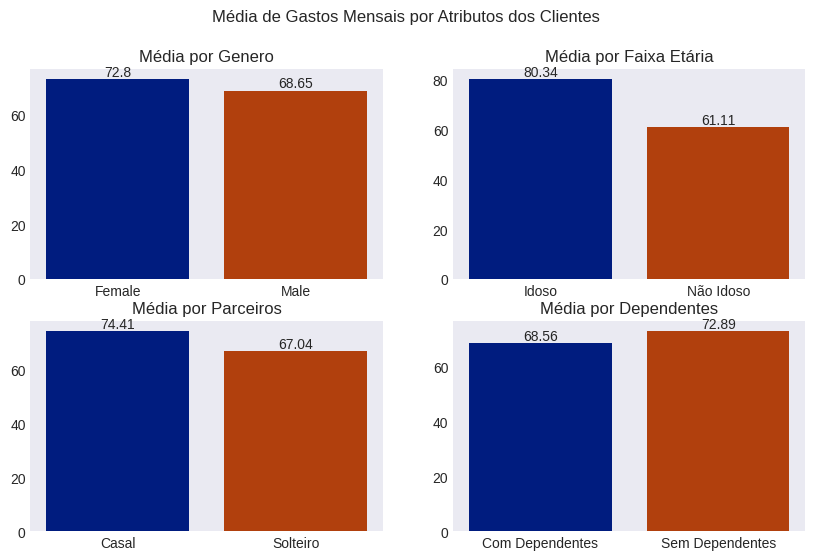

In [146]:
with plt.style.context('seaborn-v0_8-dark'):
  cores = sns.color_palette("dark")
  fig, axs = plt.subplots(2,2,figsize=(10,6))
  fig.suptitle('Média de Gastos Mensais por Atributos dos Clientes')
  bars = axs[0,0].bar(df_genero['Genero'], df_genero['Media_Gasto_Mes'], label='Genero', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,0].set_title('Média por Genero')
  bars = axs[0,1].bar(df_idoso['Idoso'], df_idoso['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[0,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[0,1].set_title('Média por Faixa Etária')
  bars = axs[1,0].bar(df_casado['Casal'], df_casado['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,0].set_title('Média por Parceiros')
  bars = axs[1,1].bar(df_dependente['Dependentes'], df_dependente['Media_Gasto_Mes'], label='Idoso', color = cores)
  for bar in bars:
    yval = bar.get_height()
    axs[1,1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  axs[1,1].set_title('Média por Dependentes')

  plt.show()

### Analise do Perfil de Clientes por Servicos





In [181]:
df_ouro.Servico_Internet.value_counts()

,count
Servico_Internet,
Fiber optic,3096
DSL,2416
No,1520


In [191]:
query = """
  SELECT Genero, CASE WHEN Idoso = 0 THEN 'Não Idoso' WHEN Idoso = 1 THEN 'Idoso' END as Idoso,
  CASE WHEN Casal = 0 THEN 'Solteiro' WHEN Casal = 1 THEN 'Casal' END as Casal,
  CASE WHEN Dependentes = 0 THEN 'Sem Dependentes' WHEN Dependentes = 1 THEN 'Com Dependentes' END as Dependentes, count(c.ID_Cliente) as Qde_Clientes,
  Servico_Telefone as Telefone , Servico_MultiplasLinhas as Multiplas_Linhas,
  CASE WHEN Servico_Internet = 'DSL' THEN 1 ELSE 0 END as Internet_DSL,
  CASE WHEN Servico_Internet = 'Fiber optic' THEN 1 ELSE 0 END as Internet_Fibra,
  Opt_OnlineSecurity as OnlineSecurity, Opt_OnlineBackup as OnlineBackup, Opt_DeviceProtection as DeviceProtection,
  Opt_TechSupport as TechSupport, Opt_StreamingTV as StreamingTV, Opt_StreamingMovies as StreamingMovies
  FROM dim_clientes as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  INNER JOIN fato_servicos_clientes as s ON c.ID_Cliente = s.ID_Cliente
  INNER JOIN dim_tipos_servicos as ts ON s.ID_Servicos = ts.ID_Servicos
  GROUP BY ts.Servico_Telefone, ts.Servico_MultiplasLinhas, ts.Servico_Internet,
  ts.Opt_OnlineSecurity, ts.Opt_OnlineBackup, ts.Opt_DeviceProtection, ts.Opt_TechSupport,
  ts.Opt_StreamingTV, ts.Opt_StreamingMovies,c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Qde_Clientes DESC
"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()
ouro_Clientes_Servicos = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Clientes_Servicos.to_parquet('data/ouro/DW_Clientes_Servicos.parquet')
ouro_Clientes_Servicos.head()

,Genero,Idoso,Casal,Dependentes,Qde_Clientes,Telefone,Multiplas_Linhas,Internet_DSL,Internet_Fibra,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Male,Não Idoso,Solteiro,Sem Dependentes,303,1,0,0,0,0,0,0,0,0,0
1,Female,Não Idoso,Solteiro,Sem Dependentes,251,1,0,0,0,0,0,0,0,0,0
2,Female,Não Idoso,Casal,Com Dependentes,203,1,0,0,0,0,0,0,0,0,0
3,Male,Não Idoso,Casal,Com Dependentes,173,1,0,0,0,0,0,0,0,0,0
4,Female,Não Idoso,Casal,Sem Dependentes,73,1,0,0,0,0,0,0,0,0,0


In [192]:
ouro_Clientes_Servicos.columns

Index(['Genero', 'Idoso', 'Casal', 'Dependentes', 'Qde_Clientes', 'Telefone',
       'Multiplas_Linhas', 'Internet_DSL', 'Internet_Fibra', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [193]:
col_servicos = ['Telefone', 'Multiplas_Linhas', 'Internet_DSL', 'Internet_Fibra']
df_genero = ouro_Clientes_Servicos.groupby('Genero')[col_servicos].sum().reset_index()
df_idoso = ouro_Clientes_Servicos.groupby('Idoso')[col_servicos].sum().reset_index()
df_casado = ouro_Clientes_Servicos.groupby('Casal')[col_servicos].sum().reset_index()
df_dependente = ouro_Clientes_Servicos.groupby('Dependentes')[col_servicos].sum().reset_index()

In [194]:
df_genero.head()

,Genero,Telefone,Multiplas_Linhas,Internet_DSL,Internet_Fibra
0,Female,825,432,517,457
1,Male,827,434,539,453


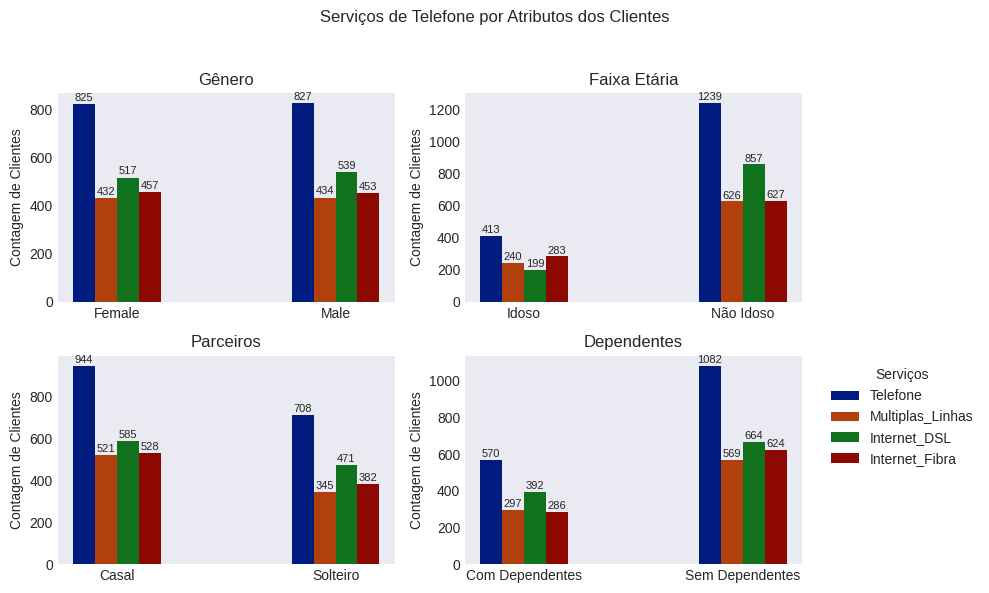

In [195]:
with plt.style.context('seaborn-v0_8-dark'):
    cores = sns.color_palette("dark", n_colors=len(col_servicos))
    fig, axs = plt.subplots(2,2,figsize=(10, 6))
    fig.suptitle('Serviços de Telefone por Atributos dos Clientes')
    bar_width = 0.1  # Largura de cada barra
    indices = range(2)
    ax = axs[0,0]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_genero[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_genero['Genero'])
    ax.set_title('Gênero')
    ax.set_ylabel('Contagem de Clientes')
    #ax.legend(title='Serviços', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = axs[0,1]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_idoso[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_idoso['Idoso'])
    ax.set_title('Faixa Etária')
    ax.set_ylabel('Contagem de Clientes')

    ax = axs[1,0]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_casado[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_casado['Casal'])
    ax.set_title('Parceiros')
    ax.set_ylabel('Contagem de Clientes')

    ax = axs[1,1]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_dependente[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_dependente['Dependentes'])
    ax.set_title('Dependentes')
    ax.set_ylabel('Contagem de Clientes')

    plt.legend(title='Serviços', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [196]:
col_servicos = [ 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
df_genero = ouro_Clientes_Servicos.groupby('Genero')[col_servicos].sum().reset_index()
df_idoso = ouro_Clientes_Servicos.groupby('Idoso')[col_servicos].sum().reset_index()
df_casado = ouro_Clientes_Servicos.groupby('Casal')[col_servicos].sum().reset_index()
df_dependente = ouro_Clientes_Servicos.groupby('Dependentes')[col_servicos].sum().reset_index()

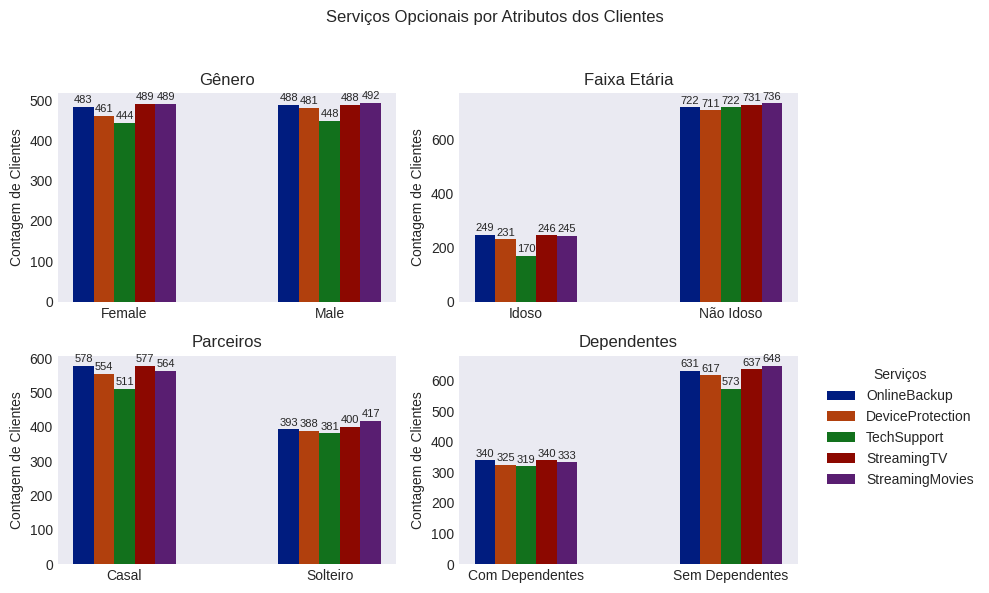

In [197]:
with plt.style.context('seaborn-v0_8-dark'):
    cores = sns.color_palette("dark", n_colors=len(col_servicos))
    fig, axs = plt.subplots(2,2,figsize=(10, 6))
    fig.suptitle('Serviços Opcionais por Atributos dos Clientes')
    bar_width = 0.1  # Largura de cada barra
    indices = range(2)
    ax = axs[0,0]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_genero[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_genero['Genero'])
    ax.set_title('Gênero')
    ax.set_ylabel('Contagem de Clientes')
    #ax.legend(title='Serviços', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = axs[0,1]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_idoso[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_idoso['Idoso'])
    ax.set_title('Faixa Etária')
    ax.set_ylabel('Contagem de Clientes')

    ax = axs[1,0]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_casado[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_casado['Casal'])
    ax.set_title('Parceiros')
    ax.set_ylabel('Contagem de Clientes')

    ax = axs[1,1]
    for i, col in enumerate(col_servicos):
        # Posicionar as barras com deslocamento
        bars = ax.bar([x + i * bar_width for x in indices], df_dependente[col],
                      width=bar_width, label=col, color=cores[i])
        # Adicionar valores acima das barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticks([x + bar_width * (len(col_servicos) - 1) / 2 for x in indices])
    ax.set_xticklabels(df_dependente['Dependentes'])
    ax.set_title('Dependentes')
    ax.set_ylabel('Contagem de Clientes')

    plt.legend(title='Serviços', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Análise de Churn e Gastos por atributos dos contratos

In [51]:
query = """
  SELECT count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio, sum(Churn) as Churn_Total,
  sum(Churn)*100.0/count(c.ID_Cliente) as Perc_Churn,
  -- Servico_Telefone, Servico_MultiplasLinhas, Servico_Internet,
  -- Opt_OnlineSecurity, Opt_OnlineBackup, Opt_DeviceProtection, Opt_TechSupport, Opt_StreamingTV, Opt_StreamingMovies,
  Tipo_Contrato, FaturaOnline, Forma_Pagto,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_contratos as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY c.Tipo_Contrato, c.FaturaOnline, c.Forma_Pagto
  ORDER by Qde_Clientes DESC
"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()
ouro_Gasto_Contratos = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Gasto_Contratos.to_parquet('data/ouro/DW_Gasto_Contratos.parquet')
ouro_Gasto_Contratos.head()

,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Churn_Total,Perc_Churn,Tipo_Contrato,FaturaOnline,Forma_Pagto,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,1397,26011,18,806,57.695061,Month-to-month,1,Electronic check,108527.30,2188085.90,3617.576667,2.589532,77.685970,1566.274803
1,469,4326,9,118,25.159915,Month-to-month,0,Mailed check,18128.40,203848.30,604.280000,1.288443,38.653305,434.644563
2,453,7236,15,188,41.501104,Month-to-month,0,Electronic check,30203.25,533871.90,1006.775000,2.222461,66.673841,1178.525166
3,424,4642,10,164,38.679245,Month-to-month,1,Mailed check,22994.30,287750.90,766.476667,1.807728,54.231840,678.657783
4,383,10237,26,146,38.120104,Month-to-month,1,Bank transfer (automatic),28682.05,821557.25,956.068333,2.496262,74.887859,2145.058094


### Análise de Churn e Gastos por atributos dos servicos

In [52]:
query = """
  SELECT count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio, sum(Churn) as Churn_Total,
  sum(Churn)*100.0/count(c.ID_Cliente) as Perc_Churn,
  Servico_Telefone, Servico_MultiplasLinhas, Servico_Internet,
  Opt_OnlineSecurity, Opt_OnlineBackup, Opt_DeviceProtection, Opt_TechSupport, Opt_StreamingTV, Opt_StreamingMovies,
  Tipo_Contrato, FaturaOnline, Forma_Pagto,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_contratos as c
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  INNER JOIN fato_servicos_clientes as s ON c.ID_Cliente = s.ID_Cliente
  INNER JOIN dim_tipos_servicos as ts ON s.ID_Servicos = ts.ID_Servicos
  GROUP BY ts.Servico_Telefone, ts.Servico_MultiplasLinhas, ts.Servico_Internet,
  ts.Opt_OnlineSecurity, ts.Opt_OnlineBackup, ts.Opt_DeviceProtection, ts.Opt_TechSupport, ts.Opt_StreamingTV, ts.Opt_StreamingMovies,
  c.Tempo_Contrato, c.Tipo_Contrato, c.FaturaOnline, c.Forma_Pagto
  ORDER by Qde_Clientes DESC
"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()
ouro_Gasto_Servicos = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Gasto_Servicos.to_parquet('data/ouro/DW_Gasto_Servicos.parquet')
ouro_Gasto_Servicos.head()

,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Churn_Total,Perc_Churn,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,Opt_OnlineSecurity,Opt_OnlineBackup,...,Opt_StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,77,77,1,28,36.363636,1,0,No,0,0,...,0,Month-to-month,0,Mailed check,1538.80,1538.8,51.293333,0.666147,19.984416,19.984416
1,52,52,1,46,88.461538,1,0,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,3637.70,3637.7,121.256667,2.331859,69.955769,69.955769
2,36,36,1,17,47.222222,1,0,No,0,0,...,0,Month-to-month,1,Mailed check,716.90,716.9,23.896667,0.663796,19.913889,19.913889
3,24,48,2,3,12.500000,1,0,No,0,0,...,0,Month-to-month,0,Mailed check,479.15,990.2,15.971667,0.665486,19.964583,41.258333
4,21,21,1,19,90.476190,1,1,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,1570.30,1570.3,52.343333,2.492540,74.776190,74.776190


### Análise de Churn por atributos dos clientes






In [53]:
query = """
  SELECT count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio, sum(Churn) as Churn_Total,
  sum(Churn)*100.0/count(c.ID_Cliente) as Perc_Churn,
  genero, idoso, casal, dependentes
  FROM dim_contratos as cont
  INNER JOIN dim_clientes as c ON cont.ID_Cliente = c.ID_Cliente
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY cont.Tipo_Contrato, cont.FaturaOnline, cont.Forma_Pagto,
     c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Churn_Total DESC

"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()
ouro_Churn_Cliente = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Churn_Cliente.to_parquet('data/ouro/DW_Churn_Cliente.parquet')
ouro_Churn_Cliente

,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Churn_Total,Perc_Churn,Genero,Idoso,Casal,Dependentes
0,296,4022,13,177,59.797297,Male,0,0,0
1,289,3961,13,167,57.785467,Female,0,0,0
2,143,2409,16,93,65.034965,Female,1,0,0
3,108,1826,16,77,71.296296,Male,1,0,0
4,98,2372,24,61,62.244898,Male,0,1,0
...,...,...,...,...,...,...,...,...,...
309,6,238,39,0,0.000000,Male,0,0,1
310,9,533,59,0,0.000000,Male,0,1,0
311,21,1168,55,0,0.000000,Male,0,1,1
312,1,71,71,0,0.000000,Male,1,0,0


### Análise de Evasão por atributos dos clientes






In [54]:
query = """
  SELECT Churn as Evasao, count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio,
  genero, idoso, casal, dependentes
  FROM dim_contratos as cont
  INNER JOIN dim_clientes as c ON cont.ID_Cliente = c.ID_Cliente
  --INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY Churn,
  -- cont.Tipo_Contrato, cont.FaturaOnline, cont.Forma_Pagto,
     c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Qde_Clientes DESC
"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

ouro_Evasao_Cliente = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Evasao_Cliente.to_parquet('data/ouro/DW_Evasao_Cliente.parquet')
ouro_Evasao_Cliente

,Evasao,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Genero,Idoso,Casal,Dependentes
0,0,963,26169,27,Male,0,0,0
1,0,909,25631,28,Female,0,0,0
2,0,715,31443,43,Female,0,1,1
3,0,713,31531,44,Male,0,1,1
4,0,482,22881,47,Female,0,1,0
5,0,439,21267,48,Male,0,1,0
6,1,429,5093,11,Female,0,0,0
7,1,418,5445,13,Male,0,0,0
8,0,176,8039,45,Male,1,1,0
9,0,166,4745,28,Male,0,0,1


### Análise de Churn por atributos dos contratos

In [59]:
query = """
  SELECT Churn as Evasao, count(c.ID_Cliente) as Qde_Clientes, sum(Tempo_Contrato) as Tempo_Contrato_Total,
  sum(Tempo_Contrato)/count(c.ID_Cliente) as Tempo_Contrato_Medio,
  -- genero, idoso, casal, dependentes
  Tipo_Contrato, FaturaOnline, Forma_Pagto,
  sum(Conta_Mensal) as Gasto_Mensal, sum(Conta_Total) as Gasto_Total, sum(Conta_Diarias) as Gasto_Diarias,
  sum(conta_Diarias)/count(c.ID_Cliente) As Media_Gasto_Dia,
  sum(conta_Mensal)/count(c.ID_Cliente) As Media_Gasto_Mes,
  sum(conta_Total)/count(c.ID_Cliente) As Media_Gasto_Total
  FROM dim_contratos as c
  -- INNER JOIN dim_clientes as c ON cont.ID_Cliente = c.ID_Cliente
  INNER JOIN fato_gastos as g ON c.ID_Cliente = g.ID_Cliente
  GROUP BY Churn,
  c.Tipo_Contrato, c.FaturaOnline, c.Forma_Pagto
  --   c.Genero, c.Idoso, c.Casal, c.Dependentes
  ORDER by Qde_Clientes DESC

"""
with engine.connect() as conn:
    result = conn.execute(text(query))
    conn.commit()

ouro_Evasao_Contrato = pd.DataFrame(result.fetchall(), columns=result.keys())
ouro_Evasao_Contrato.to_parquet('data/ouro/DW_Evasao_Contrato.parquet')
ouro_Evasao_Contrato

,Evasao,Qde_Clientes,Tempo_Contrato_Total,Tempo_Contrato_Medio,Tipo_Contrato,FaturaOnline,Forma_Pagto,Gasto_Mensal,Gasto_Total,Gasto_Diarias,Media_Gasto_Dia,Media_Gasto_Mes,Media_Gasto_Total
0,1,806,11893,14,Month-to-month,1,Electronic check,64042.20,1029142.05,2134.740000,2.648561,79.456824,1276.851179
1,0,591,14118,23,Month-to-month,1,Electronic check,44485.10,1158943.85,1482.836667,2.509030,75.270897,1960.987902
2,0,351,3751,10,Month-to-month,0,Mailed check,12767.65,170598.85,425.588333,1.212502,36.375071,486.036610
3,0,298,17132,57,Two year,0,Credit card (automatic),16045.05,982085.20,534.835000,1.794748,53.842450,3295.587919
4,0,273,17223,63,Two year,1,Bank transfer (automatic),20378.40,1330465.90,679.280000,2.488205,74.646154,4873.501465
5,0,270,16317,60,Two year,0,Bank transfer (automatic),14362.20,895154.65,478.740000,1.773111,53.193333,3315.387593
6,0,269,16815,62,Two year,1,Credit card (automatic),20261.35,1303701.85,675.378333,2.510700,75.321004,4846.475279
7,0,265,5069,19,Month-to-month,0,Electronic check,16929.85,355075.75,564.328333,2.129541,63.886226,1339.908491
8,0,265,10945,41,Two year,0,Mailed check,9283.80,424842.20,309.460000,1.167774,35.033208,1603.178113
9,0,260,3528,13,Month-to-month,1,Mailed check,13310.65,210811.70,443.688333,1.706494,51.194808,810.814231


In [ ]:
#colunas_traduzidas = ['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Servico_Internet', 'Opt_OnlineSecurity',
#                      'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'Tipo_Contrato', 'FaturaOnline',
#                      'Forma_Pagto', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']

#📄Relatorio Final